In [19]:
# The codes below were used to remove the parts of the json file that were deemed unnecessary in my research.

import json

def clean_json(file_path):
    # Read JSON file
    with open("movies-250.json", "r", encoding="utf-8") as f:
        data = json.load(f)

    # If data is in a list
    if isinstance(data, list):
        for item in data:
            if "Metascore" in item:
                del item["Metascore"]
            # Find and remove Metacritic in Ratings
            if "Ratings" in item:
                item["Ratings"] = [rating for rating in item["Ratings"]
                                  if rating.get("Source") != "Metacritic"]
    # If data is directly a dictionary
    elif isinstance(data, dict):
        if "Metascore" in data:
            del data["Metascore"]
        if "Ratings" in data:
            data["Ratings"] = [rating for rating in data["Ratings"]
                              if rating.get("Source") != "Metacritic"]

    # Save cleaned data
    with open(file_path.replace('.json', '_clean.json'), 'w', encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

    return data

# Example usage
clean_data = clean_json("movies-250.json")

In [21]:
# The codes below are the codes we wrote to show us the necessary parts.

import pandas as pd

# Read the JSON file
with open("movies-250_clean.json", "r", encoding="utf-8") as f:
    data = json.load(f)

movies = data["movies"]

# Helper function: Extract ratings from the Ratings list
def extract_rating(ratings, source):
    for rating in ratings:
        if rating["Source"] == source:
            value = rating["Value"]
            if "%" in value:
                return float(value.replace("%", ""))
            elif "/" in value:
                return float(value.split("/")[0])
    return None

# Create a new DataFrame with required columns
df = pd.DataFrame([
    {
        "Title": m["Title"],
        "Year": m["Year"],
        "Genre": m["Genre"],
        "Director": m["Director"],
        "imdbRating": float(m.get("imdbRating", 0)),
        "RT_Rating": extract_rating(m.get("Ratings", []), "Rotten Tomatoes"),
    }
    for m in movies
])

# Remove entries with missing IMDb and Rotten Tomatoes ratings
df_clean = df.dropna(subset=["imdbRating", "RT_Rating"]).reset_index(drop=True)

# Result
print(df_clean.head())

                      Title  Year                 Genre              Director  \
0  The Shawshank Redemption  1994                 Drama        Frank Darabont   
1             The Godfather  1972          Crime, Drama  Francis Ford Coppola   
2           The Dark Knight  2008  Action, Crime, Drama     Christopher Nolan   
3    The Godfather: Part II  1974          Crime, Drama  Francis Ford Coppola   
4              12 Angry Men  1957          Crime, Drama          Sidney Lumet   

   imdbRating  RT_Rating  
0         9.3       91.0  
1         9.2       97.0  
2         9.1       94.0  
3         9.0       96.0  
4         9.0      100.0  


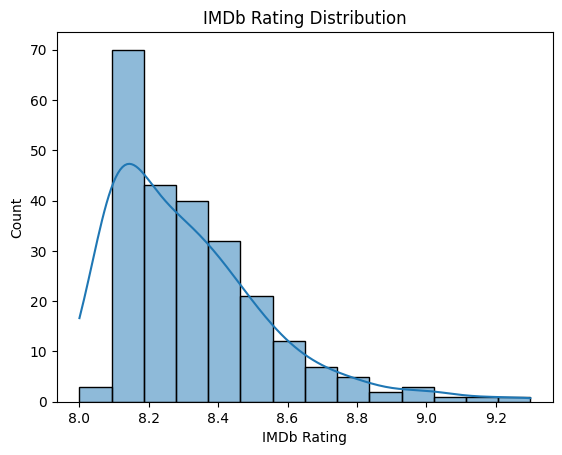

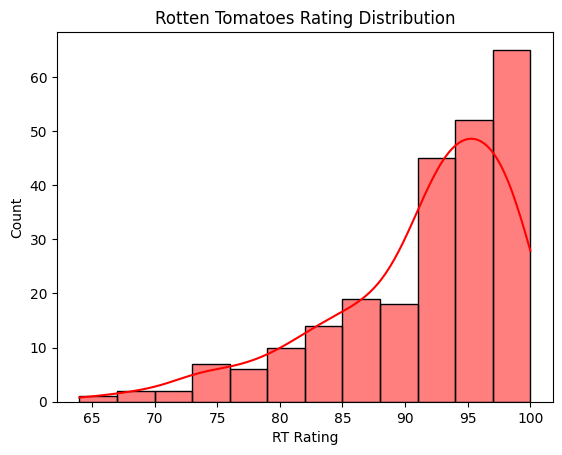

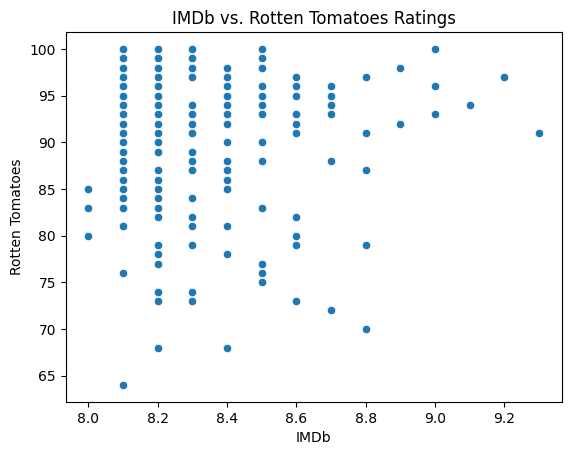

Correlation between IMDb and RT: -0.01


In [22]:
# The codes below are the codes we create histogram and scatter plot graphics.

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
sns.histplot(df_clean["imdbRating"], kde=True)
plt.title("IMDb Rating Distribution")
plt.xlabel("IMDb Rating")
plt.show()

sns.histplot(df_clean["RT_Rating"], kde=True, color="red")
plt.title("Rotten Tomatoes Rating Distribution")
plt.xlabel("RT Rating")
plt.show()

# Scatter plot
sns.scatterplot(x="imdbRating", y="RT_Rating", data=df_clean)
plt.title("IMDb vs. Rotten Tomatoes Ratings")
plt.xlabel("IMDb")
plt.ylabel("Rotten Tomatoes")
plt.show()

# Correlation
correlation = df_clean["imdbRating"].corr(df_clean["RT_Rating"])
print(f"Correlation between IMDb and RT: {correlation:.2f}")

In [23]:
## The codes below are the codes We find the t statistic and p value values

from scipy.stats import ttest_rel

# Paired t-test
t_stat, p_val = ttest_rel(df_clean["imdbRating"], df_clean["RT_Rating"] / 10)  # RT is out of 100, IMDb is out of 10

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: There is a statistically significant difference between IMDb and RT ratings.")
else:
    print("Result: There is no significant difference between IMDb and RT ratings.")

T-statistic: -16.2984
P-value: 0.0000
Result: There is a statistically significant difference between IMDb and RT ratings.
